In [349]:
import pandas as plt
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import integrate

In [350]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [351]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

In [363]:
                             # y = x^10 
func = lambda x: pow(x,10)   # <-- chuse your function

In [353]:
experiments = {}

for experiment in [1000, 10000, 100000, 1000000]:
    
    dots = []
    under_grfic_counter = 0
    
    x_coords = np.random.random_sample([experiment])
    y_coords = np.random.random_sample([experiment])
    
    for i in range(len(x_coords)):
        if y_coords[i] > func(x_coords[i]):
            in_flag = True
        else:
            in_flag = False
            under_grfic_counter = under_grfic_counter + 1 

        dots.append([x_coords[i], y_coords[i], in_flag])
    
    experiments[experiment] = dots, under_grfic_counter

In [354]:
X_more = [x for x,y,in_flag in experiments[1000][0] if in_flag]
Y_more = [y for x,y,in_flag in experiments[1000][0] if in_flag]
X_less = [x for x,y,in_flag in experiments[1000][0] if not in_flag]
Y_less = [y for x,y,in_flag in experiments[1000][0] if not in_flag]

In [355]:
x = np.linspace(0, 1, 1000)
y = func(x)

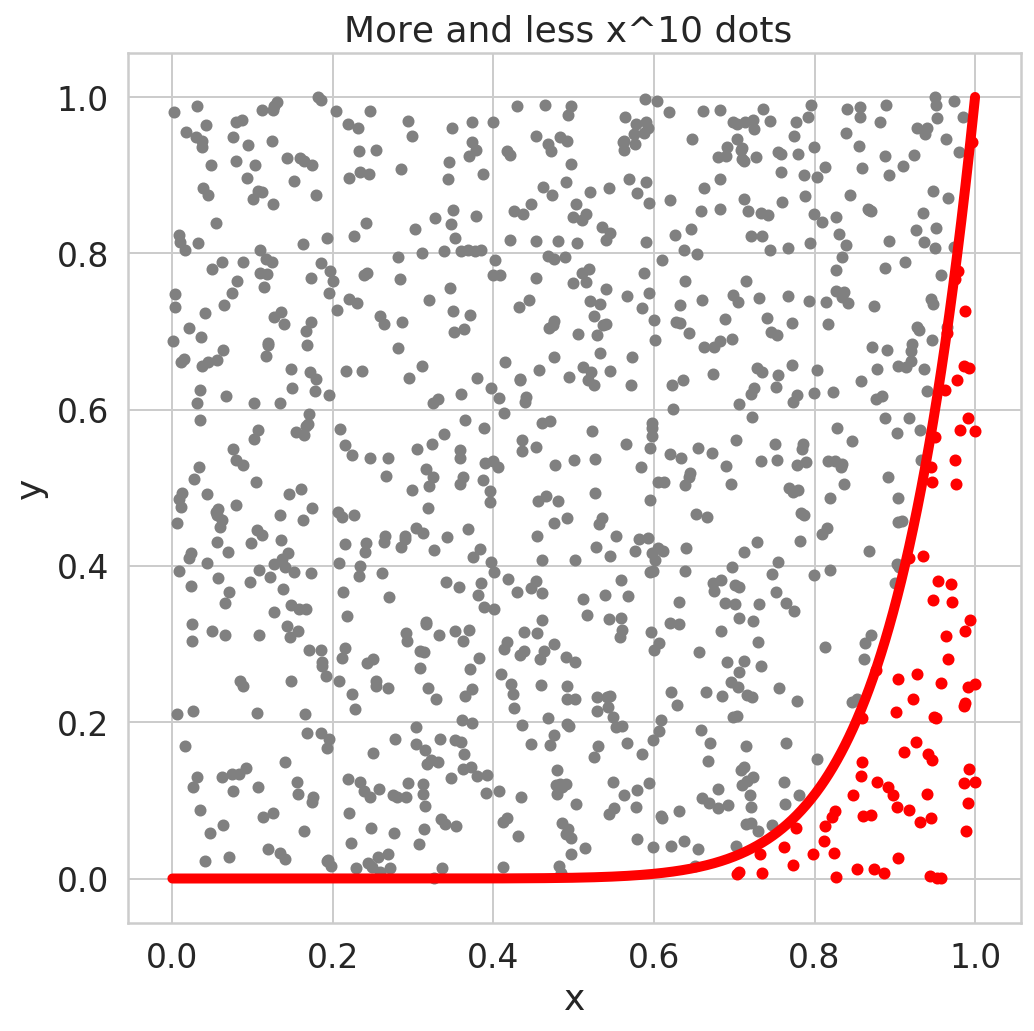

In [356]:
plt.plot(x, y, c='red', linewidth=5)

plt.xlabel("x")
plt.ylabel("y")
plt.title("More and less x^10 dots ")

plt.scatter(X_more, Y_more, s=100, c ='grey', marker='.')
plt.scatter(X_less, Y_less, s=100 , c ='red', marker = '.')

In [357]:
Square_from_integral = integrate.quad(func, 0, 1)[0]

In [358]:
Square_from_integral

0.09090909090909093

In [359]:
Monte_Carlo_AE = {}

In [360]:
for experiment in [1000, 10000, 100000, 1000000]:
    Monte_Carlo_AE[experiment] = abs(Square_from_integral - experiments[experiment][1]\
                                     /len(experiments[experiment][0]))

In [361]:
Monte_Carlo_AE

{1000: 0.007909090909090921,
 10000: 0.004909090909090932,
 100000: 0.0007290909090909292,
 1000000: 0.0002420909090909279}

(0, 1000000)

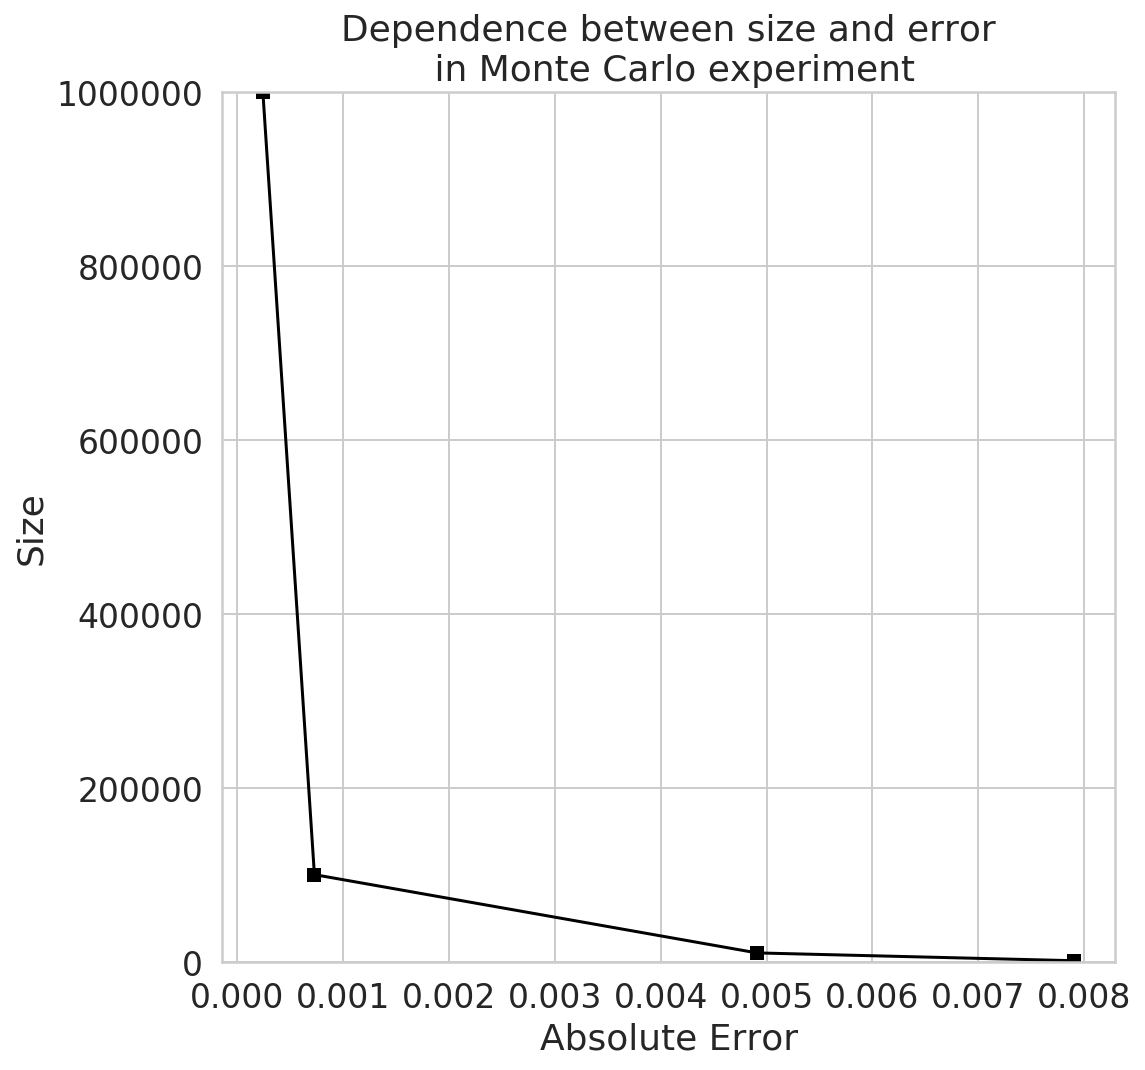

In [362]:
pylab.plot(list(Monte_Carlo_AE.values()), 
           list(Monte_Carlo_AE.keys()),
           linestyle ="-",
           marker = "s",
           color ="black")

plt.xlabel("Absolute Error")
plt.ylabel("Size")
plt.title("Dependence between size and error\n in Monte Carlo experiment")
plt.ylim(0, 1000000)